In [22]:
import tweepy          
import pandas as pd
import numpy as np

from textblob import TextBlob
import re


from IPython.display import display
import matplotlib.pyplot as plt
#import seaborn as sns
%matplotlib inline

In [23]:
# Consume:
CONSUMER_KEY    = "KhtiptQ5gtUfx0V5DCnMCeXYI"
CONSUMER_SECRET = "Em9afXhUezobaiZp2WWsGgCpyxiDSCgvrrap3yuDB8jiF3g9LQ"

# Access:
ACCESS_TOKEN  = "2851590678-AQWVYMvV4MGZBK15e4soQvfOR25s4cW1LL2Uuj0"
ACCESS_SECRET = "36dPZh8EHIVuCzaprbBYaDQUruYFr4fEHKIxtrDnPttgL"

In [24]:
def twitter_setup():
    # Will  return an authenticated api
    
    # Authentication and access using keys:
    auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
    auth.set_access_token(ACCESS_TOKEN, ACCESS_SECRET)

    # Return API with authentication:
    api = tweepy.API(auth)
    return api

In [25]:
extractor = twitter_setup()


tweets = extractor.search(q = "realDonaldTrump", count=200)
#print(extractor)
print("Number of tweets extracted: {}\n".format(len(tweets)) )


print("5 recent tweets:\n")
for tweet in tweets[:5]:
    print(tweet.text)
    print()


Number of tweets extracted: 100

5 recent tweets:

RT @sergiobolzoni: Leggo di gente che esulta per i #dazi di @realDonaldTrump sulle auto della Germania. Ma come si fa a essere così cretini…

@xtrixcyclex @establishmentno @The_Trump_Train @realDonaldTrump @POTUS No I'm not, just did the test yesterday, or… https://t.co/UgNgR91Bx0

RT @DougSides: 😡 Jim Acosta not only risked national security, he risked worldwide peace and security with his arrogant outbursts!

@realDo…

@realDonaldTrump @WhiteHouse https://t.co/11PcE8VYzI

México necesita lideres como @realDonaldTrump RT!!!



In [26]:

data = pd.DataFrame(data=[tweet.text for tweet in tweets], columns=['Tweets'])


display(data.head(10))


,Tweets
0,RT @sergiobolzoni: Leggo di gente che esulta p...
1,@xtrixcyclex @establishmentno @The_Trump_Train...
2,RT @DougSides: 😡 Jim Acosta not only risked na...
3,@realDonaldTrump @WhiteHouse https://t.co/11Pc...
4,México necesita lideres como @realDonaldTrump ...
5,@GovMikeHuckabee @POTUS @realDonaldTrump You a...
6,@xtrixcyclex @dodgetrucks218 @The_Trump_Train ...
7,RT @tedlieu: Dear @realDonaldTrump: I served o...
8,RT @The_Trump_Train: @realDonaldTrump I don’t ...
9,@Elightman @parscale @Acosta @realDonaldTrump ...


In [27]:
print(dir(tweets[0]))

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_api', '_json', 'author', 'contributors', 'coordinates', 'created_at', 'destroy', 'entities', 'favorite', 'favorite_count', 'favorited', 'geo', 'id', 'id_str', 'in_reply_to_screen_name', 'in_reply_to_status_id', 'in_reply_to_status_id_str', 'in_reply_to_user_id', 'in_reply_to_user_id_str', 'is_quote_status', 'lang', 'metadata', 'parse', 'parse_list', 'place', 'retweet', 'retweet_count', 'retweeted', 'retweeted_status', 'retweets', 'source', 'source_url', 'text', 'truncated', 'user']


In [42]:
data['len']  = np.array([len(tweet.text) for tweet in tweets])
#data['ID']   = np.array([tweet.id for tweet in tweets])
data['Date'] = np.array([tweet.created_at for tweet in tweets])
data['Source'] = np.array([tweet.source for tweet in tweets])
data['Likes']  = np.array([tweet.favorite_count for tweet in tweets])
data['RTs']    = np.array([tweet.retweet_count for tweet in tweets])

In [43]:
display(data.head(10))

,Tweets,len,ID,Date,Likes,RTs,Source
0,RT @sergiobolzoni: Leggo di gente che esulta p...,140,1006749080108830720,2018-06-13 04:04:19,0,109,Twitter for Android
1,@xtrixcyclex @establishmentno @The_Trump_Train...,139,1006749079932633088,2018-06-13 04:04:19,0,0,Twitter for Android
2,RT @DougSides: 😡 Jim Acosta not only risked na...,140,1006749079907586048,2018-06-13 04:04:19,0,506,Twitter Web Client
3,@realDonaldTrump @WhiteHouse https://t.co/11Pc...,52,1006749079886442496,2018-06-13 04:04:19,0,0,Twitter for Android
4,México necesita lideres como @realDonaldTrump ...,51,1006749079664115714,2018-06-13 04:04:19,0,0,Twitter for Android
5,@GovMikeHuckabee @POTUS @realDonaldTrump You a...,106,1006749079228026880,2018-06-13 04:04:19,0,0,Twitter Web Client
6,@xtrixcyclex @dodgetrucks218 @The_Trump_Train ...,140,1006749078892367872,2018-06-13 04:04:19,0,0,Twitter for Android
7,RT @tedlieu: Dear @realDonaldTrump: I served o...,140,1006749078674341888,2018-06-13 04:04:19,0,6232,Twitter for Android
8,RT @The_Trump_Train: @realDonaldTrump I don’t ...,138,1006749078502469632,2018-06-13 04:04:19,0,200,Twitter for iPhone
9,@Elightman @parscale @Acosta @realDonaldTrump ...,96,1006749077948784640,2018-06-13 04:04:19,0,0,Twitter for iPad


In [44]:

mean = np.mean(data['len'])

print("The lenght's average in tweets: {}".format(mean))


The lenght's average in tweets: 116.27


In [45]:
fav_max = np.max(data['Likes'])
rt_max  = np.max(data['RTs'])

fav = data[data.Likes == fav_max].index[0]
rt  = data[data.RTs == rt_max].index[0]

# Max FAVs:
print("The tweet with more likes is: \n{}".format(data['Tweets'][fav]))
print("Number of likes: {}".format(fav_max))
print("{} characters.\n".format(data['len'][fav]))

# Max RTs:

print("The tweet with more retweets is: \n{}".format(data['Tweets'][rt]))
print("Number of retweets: {}".format(rt_max))
print("{} characters.\n".format(data['len'][rt]))

The tweet with more likes is: 
RT @sergiobolzoni: Leggo di gente che esulta per i #dazi di @realDonaldTrump sulle auto della Germania. Ma come si fa a essere così cretini…
Number of likes: 0
140 characters.

The tweet with more retweets is: 
RT @realDonaldTrump: https://t.co/tJG3KIn2q0
Number of retweets: 46826
44 characters.



In [46]:
tlen = pd.Series(data=data['len'].values, index=data['Date'])
tfav = pd.Series(data=data['Likes'].values, index=data['Date'])
tret = pd.Series(data=data['RTs'].values, index=data['Date'])

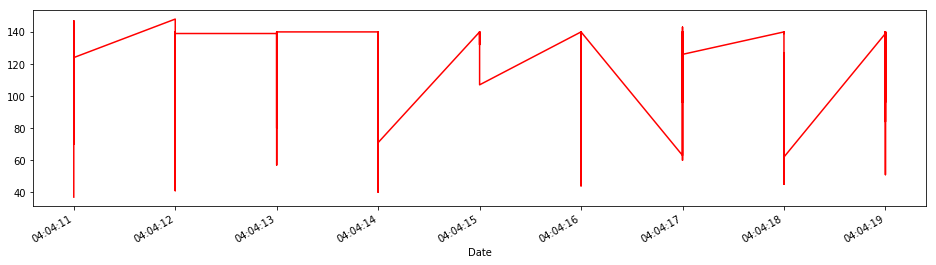

In [47]:
tlen.plot(figsize=(16,4), color='r');

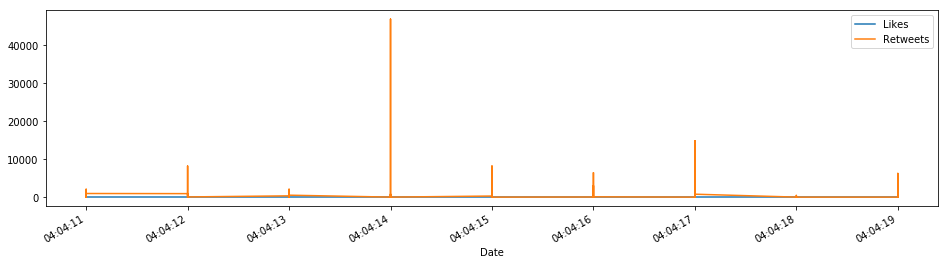

In [51]:
tfav.plot(figsize=(16,4), label="Likes", legend=True)
tret.plot(figsize=(16,4), label="Retweets", legend=True);

In [52]:

sources = []
for source in data['Source']:
    if source not in sources:
        sources.append(source)


print("Creation of content sources:")
for source in sources:
    print("* {}".format(source))


Creation of content sources:
* Twitter for Android
* Twitter Web Client
* Twitter for iPhone
* Twitter for iPad
* Twitter Lite
* dlvr.it


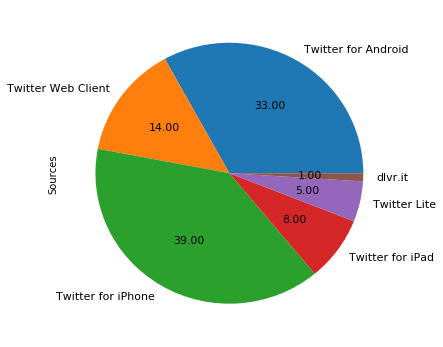

In [54]:
# We create a numpy vector mapped to labels:

percent = np.zeros(len(sources))

for source in data['Source']:
    for index in range(len(sources)):
        if source == sources[index]:
            percent[index] += 1
            pass

percent /= 100


pie_chart = pd.Series(percent, index=sources, name='Sources')
pie_chart.plot.pie(fontsize=11, autopct='%.2f', figsize=(6, 6));


In [56]:
def clean_tweet(tweet):
    '''
    Utility function to clean the text in a tweet by removing 
    links and special characters using regex.
    '''
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())

def analize_sentiment(tweet):
    '''
    Utility function to classify the polarity of a tweet
    using textblob.
    '''
    analysis = TextBlob(clean_tweet(tweet))
    if analysis.sentiment.polarity > 0:
        return 1
    elif analysis.sentiment.polarity == 0:
        return 0
    else:
        return -1


In [59]:
# Column >> result
data['SA'] = np.array([ analize_sentiment(tweet) for tweet in data['Tweets'] ])

#display head again
display(data.head(10))

li = []
for i in range(20):
    li.append( str(data.loc[:20, ["Tweets"] ]) )

,Tweets,len,ID,Date,Likes,RTs,Source,SA
0,RT @sergiobolzoni: Leggo di gente che esulta p...,140,1006749080108830720,2018-06-13 04:04:19,0,109,Twitter for Android,0
1,@xtrixcyclex @establishmentno @The_Trump_Train...,139,1006749079932633088,2018-06-13 04:04:19,0,0,Twitter for Android,0
2,RT @DougSides: 😡 Jim Acosta not only risked na...,140,1006749079907586048,2018-06-13 04:04:19,0,506,Twitter Web Client,0
3,@realDonaldTrump @WhiteHouse https://t.co/11Pc...,52,1006749079886442496,2018-06-13 04:04:19,0,0,Twitter for Android,0
4,México necesita lideres como @realDonaldTrump ...,51,1006749079664115714,2018-06-13 04:04:19,0,0,Twitter for Android,0
5,@GovMikeHuckabee @POTUS @realDonaldTrump You a...,106,1006749079228026880,2018-06-13 04:04:19,0,0,Twitter Web Client,-1
6,@xtrixcyclex @dodgetrucks218 @The_Trump_Train ...,140,1006749078892367872,2018-06-13 04:04:19,0,0,Twitter for Android,1
7,RT @tedlieu: Dear @realDonaldTrump: I served o...,140,1006749078674341888,2018-06-13 04:04:19,0,6232,Twitter for Android,-1
8,RT @The_Trump_Train: @realDonaldTrump I don’t ...,138,1006749078502469632,2018-06-13 04:04:19,0,200,Twitter for iPhone,-1
9,@Elightman @parscale @Acosta @realDonaldTrump ...,96,1006749077948784640,2018-06-13 04:04:19,0,0,Twitter for iPad,1


In [58]:
print(li)

["                                               Tweets\n0   RT @sergiobolzoni: Leggo di gente che esulta p...\n1   @xtrixcyclex @establishmentno @The_Trump_Train...\n2   RT @DougSides: 😡 Jim Acosta not only risked na...\n3   @realDonaldTrump @WhiteHouse https://t.co/11Pc...\n4   México necesita lideres como @realDonaldTrump ...\n5   @GovMikeHuckabee @POTUS @realDonaldTrump You a...\n6   @xtrixcyclex @dodgetrucks218 @The_Trump_Train ...\n7   RT @tedlieu: Dear @realDonaldTrump: I served o...\n8   RT @The_Trump_Train: @realDonaldTrump I don’t ...\n9   @Elightman @parscale @Acosta @realDonaldTrump ...\n10  RT @EpochTimes: Thousands Suspected of Child S...\n11  @realDonaldTrump That's because they are not o...\n12  RT @AMErikaNGIRLBOT: Watch⬇️ Justin Trudeau’s ...\n13  @realDonaldTrump Dear God people we should all...\n14  @FoxNews @MZHemingway @realDonaldTrump Can we ...\n15  RT @SenatorCantwell: Last week, I demanded @re...\n16  RT @JohnJohnpitt11: @JohnellU @DonnaWR8 @realD...\n17  @par

In [60]:
pos_tweets = [ tweet for index, tweet in enumerate(data['Tweets']) if data['SA'][index] > 0]
neu_tweets = [ tweet for index, tweet in enumerate(data['Tweets']) if data['SA'][index] == 0]
neg_tweets = [ tweet for index, tweet in enumerate(data['Tweets']) if data['SA'][index] < 0]

In [61]:
print("Percentage of positive tweets: {}%".format(len(pos_tweets)*100/len(data['Tweets'])))
print("Percentage of neutral tweets: {}%".format(len(neu_tweets)*100/len(data['Tweets'])))
print("Percentage de negative tweets: {}%".format(len(neg_tweets)*100/len(data['Tweets'])))

Percentage of positive tweets: 33.0%
Percentage of neutral tweets: 50.0%
Percentage de negative tweets: 17.0%
